<h2> Base dos Dados para testar quão bem os jogos com x gols se encaixam em um Poisson <h2>
    

<h7> Cenário: temos um modelo paramétrico e dados observados da Base dos Dados. 
De modo informal, queremos saber se é razoável afirmar que os dados foram extraídos da distribuição descrita pelo modelo. <h7>
Por exemplo, os dados são os gols que o time mandante faz em uma cada partida do campeonato brasileiro em certo ano e o modelo é a distribuição de Poisson. 

In [1]:
#abrimos o pacote da basedosdados e criamos um dataframe com esses dados
# !pip install basedosdados - caso voce nao tenha baixado, tirar do comentário
import basedosdados as bd
import numpy as np
import pandas as pd

In [2]:
#vamos abrir a base com o bd.read_table() e ja filtra-la
df = bd.read_table(
      dataset_id='mundo_transfermarkt_competicoes', 
      table_id='brasileirao_serie_a',
      billing_project_id='double-voice-305816'
)[["ano_campeonato", "gols_man", "gols_vis", "time_man", "time_vis"]]

Downloading: 100%|██████████| 7030/7030 [00:03<00:00, 2126.61rows/s]


<h7> Diferentes anos, mesma história <h7>

In [3]:
def gera_base_ano(ano):
    return  df[df["ano_campeonato"] == ano]

anos = [2004, 2005, 2013,2015,2019,2020]
bases = list(map(gera_base_ano, anos))   
#0- 2013 1-2015 2-2019
bases[5]

,ano_campeonato,gols_man,gols_vis,time_man,time_vis
6650,2020,0.0,1.0,Coritiba FC,Internacional
6651,2020,3.0,2.0,Sport Recife,Ceará SC
6652,2020,0.0,1.0,Flamengo,Atlético-MG
6653,2020,1.0,1.0,Santos FC,RB Bragantino
6654,2020,1.0,0.0,Grêmio,Fluminense
...,...,...,...,...,...
7025,2020,0.0,0.0,Internacional,Corinthians
7026,2020,2.0,0.0,EC Bahia,Santos FC
7027,2020,2.0,0.0,Athletico-PR,Sport Recife
7028,2020,2.0,1.0,Ceará SC,Botafogo


<h7> Ao invés disso tudo, a read_sql() <h7>

In [4]:
base_alt_2019 = bd.read_sql('''SELECT ano_campeonato, gols_man, gols_vis, time_man, time_vis 
FROM `basedosdados.mundo_transfermarkt_competicoes.brasileirao_serie_a` 
WHERE ano_campeonato != 2005 ''' , 'double-voice-305816')

Downloading: 100%|██████████| 380/380 [00:01<00:00, 335.59rows/s]


In [ ]:
# teve problemas?
?bd.read_sql
?bd.read_table

<h7> Indícios de proximidade <h7>

In [6]:
#descricao dos dados do mandante
def desc(i):
    return pd.DataFrame(bases[i]["gols_man"].describe()).rename(columns = 
                                                                {"gols_man" : i}).rename(columns=
                                                                                        {0 : 2004,
                                                                                        1:2005,
                                                                                        2:2013,
                                                                                        3:2015,
                                                                                        4:2019,
                                                                                        5:2020})
#descricao
def desc2(i):
    return pd.DataFrame(bases[i]["gols_vis"].describe()).rename(columns = 
                                                                {"gols_vis" : i}).rename(columns=
                                                                                        {0 : 2004,
                                                                                        1:2005,
                                                                                        2:2013,
                                                                                        3:2015,
                                                                                        4:2019,
                                                                                        5:2020})

<h7> Como estão distribuidos os gols dos mandantes <h7>

In [7]:
desc(0).join(desc(1)).join(desc(2)).join(desc(3)).join(desc(4)).join(desc(5))

,2004,2005,2013,2015,2019,2020
count,456.000000,418.000000,380.000000,380.000000,380.000000,380.000000
mean,1.688596,1.796651,1.468421,1.460526,1.381579,1.410526
std,1.347183,1.310093,1.198747,1.191890,1.223852,1.101639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
max,7.000000,7.000000,6.000000,6.000000,6.000000,5.000000


In [11]:
1.310093**2

1.716343668649

<h7> Como estão distribuidos os gols dos visitantes <h7>

In [12]:
desc2(0).join(desc2(1)).join(desc2(2)).join(desc2(3)).join(desc2(4)).join(desc(5))

,2004,2005,2013,2015,2019,2020
count,456.000000,418.000000,380.000000,380.000000,380.000000,380.000000
mean,1.067982,1.351675,0.994737,0.900000,0.923684,1.410526
std,1.078147,1.158126,1.011790,0.974882,0.934232,1.101639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000
max,5.000000,6.000000,5.000000,4.000000,5.000000,5.000000


<h9>a gente assiste ao mesmo jogo faz 16 anos??? <h9>

<h2> --------------------------------------------------------------------------------- <h2>

<h7> Como usar distribuições para aproximar isso, e porque usar Poisson e não Normal ou Binomial? <h7>

In [13]:
#antes do bd: placar_casa = np.array([0,1,2,3,4,5,6])
#antes do bd: partidas_casa = np.array([44, 57,45,33,5,4,2])

placar_casa = np.sort(np.array((bases[4]["gols_man"].unique())))          

#placar em casa quanto gols (bins) 
#partidas em casa = numero de jogos onde aconteceram tantos gols acima 
#com o bd usamos dados reais facilmente:
bases[4]["partida"] = 1
partidas_casa = bases[4].groupby("gols_man")["partida"].sum()



##antes do bd: freq_casa = partidas_casa/np.sum(partidas_casa)
#partidas_casa = spfc_casa.groupby("ano_campeonato").count()
freq_casa = partidas_casa/np.sum(partidas_casa)
media = np.sum(freq_casa*placar_casa)


In [14]:
partidas_casa

gols_man
0.0     93
1.0    144
2.0     83
3.0     36
4.0     18
5.0      1
6.0      5
Name: partida, dtype: int64

<h7> Usando a Poisson <h7>

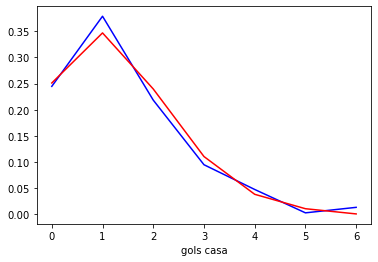

In [15]:
from matplotlib import pyplot as plt
import scipy.stats as stat
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(placar_casa, freq_casa, color = 'blue')
freq_estim_poisson = np.concatenate((stat.poisson.pmf([0,1,2,3,4,5], media), [1-stat.poisson.cdf(6,media)]))
ax1.plot(placar_casa, freq_estim_poisson , color = 'red')
ax1.set_xlabel('gols casa')
plt.show()

<h7> Parece um bom modelo.  Vamos comparar com outro, que não parece tão bom. Gráficos parecidos não necessariamente indicam qualidade parecida! Vamos ver com a binomial <h7>

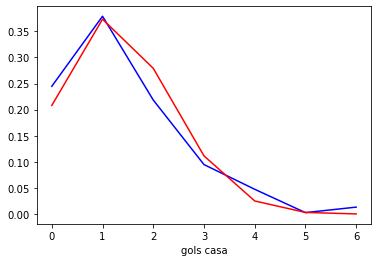

In [16]:
from matplotlib import pyplot as plt
import scipy.stats as stat
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(placar_casa, freq_casa, color = 'blue')
ax1.plot(placar_casa, stat.binom.pmf(placar_casa, 6, media/6), color = 'red')
ax1.set_xlabel('gols casa')
plt.show()

<h7> Suposição de times com distribuições parecidas? <h7>

In [18]:
base_alt_2019_sp = base_alt_2019[base_alt_2019["time_man"] == "São Paulo"]
base_alt_2019_sp["partida"] = 1

base_alt_2019_fl = base_alt_2019[base_alt_2019["time_man"] == "Fluminense"]
base_alt_2019_fl["partida"] = 1

In [19]:
#spfc
placar_casa_spfc = np.sort(np.array((base_alt_2019_sp["gols_man"].unique())))   
partidas_casa_spfc = base_alt_2019_sp.groupby("gols_man")["partida"].sum()
freq_casa_spfc = partidas_casa_spfc/np.sum(partidas_casa)
media_spfc = np.sum(freq_casa*placar_casa)

#fluminense
placar_casa_flu = np.sort(np.array((base_alt_2019_fl["gols_man"].unique())))   
partidas_casa_flu = base_alt_2019_fl.groupby("gols_man")["partida"].sum()
freq_casa_flu = partidas_casa_flu/np.sum(partidas_casa)
media_flu = np.sum(freq_casa*placar_casa)

<h7> Poisson doS Tricolor <h7> 

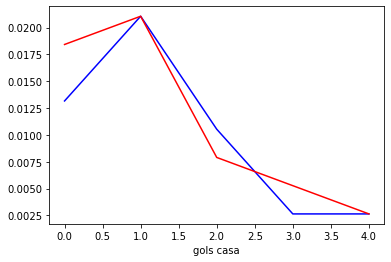

In [20]:
from matplotlib import pyplot as plt
import scipy.stats as stat
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(placar_casa_spfc, freq_casa_spfc, color = 'blue')
#freq_estim_poisson = np.concatenate((stat.poisson.pmf([0,1,2,3,4,5], media), [1-stat.poisson.cdf(6,media)]))
ax1.plot(placar_casa_flu,freq_casa_flu , color = 'red')
ax1.set_xlabel('gols casa')
plt.show()

<h2>------------------------------------------------------------------------------------<h2>

A pergunta sobre aderência do modelo é: os dados são compatíveis com o modelo proposto?
Dito de outra forma, os dados são típicos de uma extração da distribuição proposta?
* Coeficiente de determinação $R^2$ (vou pular essa ideia, mas podemos falar do pseudo-$R^2$ para a regressão logística)
* O teste $\chi^2$
* G-score
* Bootstrap ingênuo

<h3> Teste $\chi^2$ <h3>

Por um lado temos os dados dados por gols_casa (e freq_casa).  Por outro temos o modelo, dado por freq_estim = stat.binom.pmf(placar_casa, 6, media/6)

In [21]:
obs = partidas_casa
freq_obs = freq_casa
freq_estim_poisson = np.concatenate((stat.poisson.pmf([0,1,2,3,4,5],media),[1-stat.poisson.cdf(5, media)]))
expected = freq_estim_poisson*190

print(freq_estim_poisson)
print(freq_obs)
print(np.array(obs).astype(np.float))
print(expected)

[0.25118164 0.34702726 0.23972278 0.11039865 0.03813111 0.01053623
 0.00300233]
gols_man
0.0    0.244737
1.0    0.378947
2.0    0.218421
3.0    0.094737
4.0    0.047368
5.0    0.002632
6.0    0.013158
Name: partida, dtype: float64
[ 93. 144.  83.  36.  18.   1.   5.]
[47.72451107 65.93517977 45.54732813 20.97574322  7.24491131  2.00188339
  0.57044313]


Queremos testar a plausibilidade de um fenômeno como o descrito pelo modelo gerar os dados que são observados. Uma medida seria a probabilidade de ocorrer o observado se a distribuição é exatamente a dada pelo modelo, isto é, $Pr(X_0 = 0, ... , X_6= 2 | \lambda = 0.232)$.
Essa probabilidade é muito pequena mesmo que o modelo seja perfeito.

Fazendo por partes, vamos olhar cada componente do histograma. Por exempolo, olhando para o primeiro componente do histograma (haver 0 gols em uma partida) temos que 44 sucessos em 190 tentativas.  A variável aleatória correspondente a essa entrada do histograma é $X_0 \sim bin(190, 0.232^2)$ (que tem média $\mu = 190\cdot 0.232$ e variância $\sigma^2 = 190\cdot 0.232 \cdot (1-0.232)$.  Devemos esperar que X se desvie da média como observado ou mais?  Ou seja, quanto vale $Pr(|X-\mu|>= |44-\mu|)$?
Reescrevendo, a medida de plausibilidade é $Pr(\frac{X_0-\mu}{\sigma} >= \frac{44-\mu}{\sigma})$.  Aproximando a binomial por uma normal, com média $\mu = n\cdot p$ e variância $\sigma = n \cdot p \cdot (1-p) \approx n\cdot p$, temos que essa probabilidade é aproximada por $Pr(Z >= \frac{44-\mu}{\sigma})$, onde $Z \sim normal(0,1)$.  Ou então, equivalentemente, $Pr(\chi^2 >= \frac{(44-\mu)^2}{\sigma^2} = \frac{(Obs_0 - Esp_0)^2}{Esp_0})$

Fazer isso para todos as componentes do histograma exige um pouco mais de trabalho. No final das contas, como mostrou Pearson,  a probabilide é assintoticamente $Pr(\chi^2 >= \sum\frac{(O_i-E_i)^2}{E_i})$ onde $\chi^2$ tem $n-1$ graus de liberdade.




In [ ]:
#Poisson
soma = sum((obs-expected)*(obs-expected)/expected)
print(soma, 1-stat.chi2.cdf(soma, df = 6))
stat.chisquare(f_obs=obs, f_exp=expected) # Teste chi-square já pronto e embalado no scipy.stats

In [ ]:
#Binomial
freq_estim_bin = stat.binom.pmf([0,1,2,3,4,5, 6], 6 , media/6)
expected_bin = freq_estim_bin*190
stat.chisquare(f_obs=obs, f_exp=expected_bin) # Teste chi-square já pronto e embalado no scipy.stats_bin

<h4>Problemas do teste $\chi^2$<h4>

O teste chi-quadrado faz a aproximação da binomial pela normal. Portanto, situações onde essa aproximação é fraca também afetam o teste.  Essa situação ocorre, por exemplo, quando temos entradas do histograma com contagens iguais ou próximas a zero.

Outro problema é que os parâmetros são estimados por maximização da verossimilhança e não por por minimização do valor do teste chi-quadrado.  O parâmetro usado pode não ser o que minimiza o teste.

<h3>G-test<h3>

A fórmula do G-teste é $G = \sum_{i}{O_i\cdot log(\frac{O_i}{E_i})}$. Mostra-se que G também tem, assintoticamente, distribuição $\chi ^2$ com n-1 graus de liberdade como no teste chi-quadrado.
Um ponto a favor do G-test é que encontrar o modelo paramétrico que dá o melhor G-score é o mesmo que maximizar a verossimilhança.
Além disso, o G-test sofre menos com histogramas com entradas próximas ou iguais a zero.

In [ ]:
#poisson
soma = 2*sum((obs)*np.log(obs/expected))
print(soma, 1-stat.chi2.cdf(soma, df = 6))
stat.power_divergence(f_obs=obs, f_exp=expected, lambda_ = 'log-likelihood') # Teste G pronto e embalado no scipy.stats

In [ ]:
#binomial
soma = 2*sum((obs)*np.log(obs/expected_bin))
print(soma, 1-stat.chi2.cdf(soma, df = 6))
stat.power_divergence(f_obs=obs, f_exp=expected_bin, lambda_ = 'log-likelihood') # Teste G pronto e embalado no scipy.stats

<h3> Teste Multinomial <h3>

A ideia do teste é a mais simples possível e, na ordem lógica, deveria ser o primeiro teste a ser apresentado.
    Uma vez estabelecido o parâmetro do modelo, o modelo fica totalmente representado por um vetor de probabilidades $p$ (no caso do modelo Poisson, esse vetor é $p = [0.208 0.327 0.256 0.134 0.053 0.016 0.006]$ . Supondo que o modelo esteja correto, a probabilidade de ocorrer o resultado observado é $Pr(M = O)$, onde $M\sim multinomial(p)$.
    
   Claro que essa probabilidade é muito baixa em geral. Mas queremos saber se o vetor de observações $O$ é típico de uma realização da variável aleatória $M$.  Para isso, calculamos, para todos os possíveis vetores $\omega$, as probabilidades $Pr(M = \omega)$.  O vetor de observações define a cauda $\sum_{\omega \thinspace tal\thinspace que\thinspace Pr(X = \omega)\geq Pr(X=O)}{Pr(X=\omega)}$
   
   Ou seja, queremos saber qual é a probabilidade de ocorrer o que foi observado ou coisa menos provável.  Se o modelo "é razoável", esperamos que essa probabilidade seja grande.  Se essa probabilidade for pequena, a chance do modelo ter produzido o  que foi de fato observado é igualmente pequena.

In [ ]:
# Poisson
# para fazer o experimento, reduzi o vetor para 4 entradas, pois com 7 entradas a demanda computacional explode.

freq_poisson_reduzido = np.concatenate((stat.poisson.pmf([0,1,2],media),[1-stat.poisson.cdf(2, media)]))
obs_reduzido = [44.000, 57.000, 45.000, 44.000]
prob_corte = stat.multinomial.pmf(obs_reduzido, n = 190, p=freq_poisson_reduzido)

soma = 0
cont_cenarios = 0
soma_tudo = 0
cont_tudo = 0
for k0 in range(191):
    for k1 in range(191 - k0):
        for k2 in range(191 - k0 - k1):
            k3 = 190 - (k0+k1+k2)
            prob_cenario = stat.multinomial.pmf([k0, k1, k2, k3], n = 190, p=freq_poisson_reduzido)
            soma_tudo += prob_cenario
            cont_tudo += 1
            if prob_cenario <= prob_corte:
                soma += prob_cenario
                cont_cenarios += 1
                
print('freq modelo: ', freq_binomial_reduzido)
print('obs_reduzido: ', obs_reduzido)
print('soma prob: ', soma)
print('cenarios piores: ', cont_cenarios)
print('soma tudo: ', soma_tudo)
print('conta tudo: ', cont_tudo)
print('prob corte: ', prob_corte)

Verificando que o teste chi-quadrado dá resultado muito próximo

In [ ]:
print('teste chi-quadrado: ', stat.chisquare(f_obs=obs_reduzido, f_exp=freq_poisson_reduzido*190)) # G-test dá praticamente igual

In [ ]:
#binomial
freq_binomial_reduzido = np.append(stat.binom.pmf([0,1,2], 6 , media/6), sum(stat.binom.pmf([3,4,5,6], 6, media/6)))
obs_reduzido = [44.000, 57.000, 45.000, 44.000]
prob_corte = stat.multinomial.pmf(obs_reduzido, n = 190, p=freq_binomial_reduzido)

soma = 0
cont_cenarios = 0
soma_tudo = 0
cont_tudo = 0
for k0 in range(191):
    for k1 in range(191 - k0):
        for k2 in range(191 - k0 - k1):
            k3 = 190 - (k0+k1+k2)
            prob_cenario = stat.multinomial.pmf([k0, k1, k2, k3], n = 190, p=freq_binomial_reduzido)
            soma_tudo += prob_cenario
            cont_tudo += 1
            if prob_cenario <= prob_corte:
                soma += prob_cenario
                cont_cenarios += 1
                
print('freq modelo: ', freq_binomial_reduzido)
print('obs_reduzido: ', obs_reduzido)
print('soma prob: ', soma)
print('cenarios piores: ', cont_cenarios)
print('soma tudo: ', soma_tudo)
print('conta tudo: ', cont_tudo)
print('prob corte: ', prob_corte)

Verificando que o teste chi-quadrado dá resultado muito próximo

In [ ]:
print('teste chi-quadrado: ', stat.chisquare(f_obs=obs_reduzido, f_exp=freq_binomial_reduzido*190)) # G-test dá praticamente igual

O teste multinomial é exato, no sentido que expressa exatamente a chance do modelo, caso seja correto, ter produzido aquelas observações (ou menos prováveis) por acaso.
Além disso, procurar os parâmetros do modelo que maximizam o score neste teste é equivalente a maximizar a verossimilhança.
No entanto, para um número muito grande de possíveis cenários, as probabilidades são muito pequenas e os erros de arredondamento podem afetar o resultado.
Além disso, para casos reais este teste neste formato é pouco prático, pois a varredura de todas as possibilidades facilmente torna-se inviável computacionalmente.

<h3> Teste multinomial por monte-carlo (bootstrap paramétrico?) <h3>

É totalmente baseado no teste multinomial.  Mas ao invés de varrer todas as possíveis ocorrências de um histograma, estima-se a probabilidade $\sum_{\omega \thinspace tal\thinspace que\thinspace Pr(X = \omega)\geq Pr(X=O)}{Pr(X=\omega)}$ por amostragem.
Dada a variável aleatória $M\sim multinomial(p)$, onde $p$ é o vetor de probabilidades dado pelo modelo, geramos um número grande $N$ de vetores aleatórios $v_i, i=1..N$, realizações de $M$.
Queremos saber se o vetor $O$ é "típico" de uma realização de $M$.  Calculamos então as probabilidades $Pr(M = v_i)$ e verificamos em que quantil se posicional $Pr(M = O)$.  Essa é a probabilidade estimada de $M$ gerar uma observação como $O$ ou mais improvável.
Na prática usamos o log da probabilidade, pois os números são muito pequenos.  O log da probabilidade não altera a ordenção dos vetores.

In [ ]:
def MC_multinomial_test(obs, p, N):
    n = sum(obs)
    pr_obs = stat.multinomial.logpmf(obs, n, p)
    
    cont_mais_prov_eq = 0
    cont_menos_prov = 0
    for i in range(N):
        v = stat.multinomial.rvs(n, p)
        pr_amostra = stat.multinomial.logpmf(v, n, p)
        if pr_amostra >= pr_obs:
            cont_mais_prov_eq += 1
        else:
            cont_menos_prov +=1

    return (cont_menos_prov/N)


In [ ]:
print(MC_multinomial_test(obs_reduzido, freq_poisson_reduzido, 10000))
print(stat.power_divergence(f_obs=obs_reduzido, f_exp=freq_poisson_reduzido*190, lambda_ = 'log-likelihood'))

In [ ]:
print(MC_multinomial_test(obs, freq_estim_poisson, 20000))
print(stat.power_divergence(f_obs=obs, f_exp=expected, lambda_ = 'log-likelihood'))

In [ ]:
print(MC_multinomial_test(obs, freq_estim_bin, 20000))
print(stat.power_divergence(f_obs=obs, f_exp=expected_bin, lambda_ = 'log-likelihood'))

O teste multinomial por amostragem é bem flexível e preciso (embora computacionalmente intenso) e se aplica bem a uma ampla variedade de situações.  Para o nosso caso de placares de futebol parece ser um procedimento adequado.

<h1>Previsao resultados campeonato brasileiro<h1>